

<center><font color='blue'><h2>This notebook intends to analyze and create a model on the Wisconsin Cancer  dataset to predict whether the cancer is benign or malign</font></h2></center>
<center><h3><a href="https://ibrahim-projets.herokuapp.com/projets/wisconsin_cancer/" target="_top">Try the web app</a></h3></center>




In [ ]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd /gdrive/'My Drive'/projets

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/projets


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time 
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#Feature Standard
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#loaddata
df=pd.read_csv('/gdrive/My Drive/projets/data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
target= df.diagnosis                        
feature_to_remove = ['Unnamed: 32','id','diagnosis']
df = df.drop(feature_to_remove,axis = 1 )
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


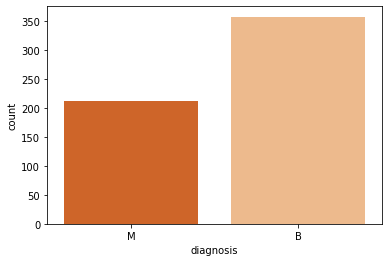

In [ ]:
sns.countplot(x = target, data = df, palette = "Oranges_r");

In [ ]:
df.describe(include='all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h4><center><font color='blue'><strong>Visualization</strong></font></center><h4>
<p>Before violin and swarm plot visualization we need to normalize or standardize.</p>





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

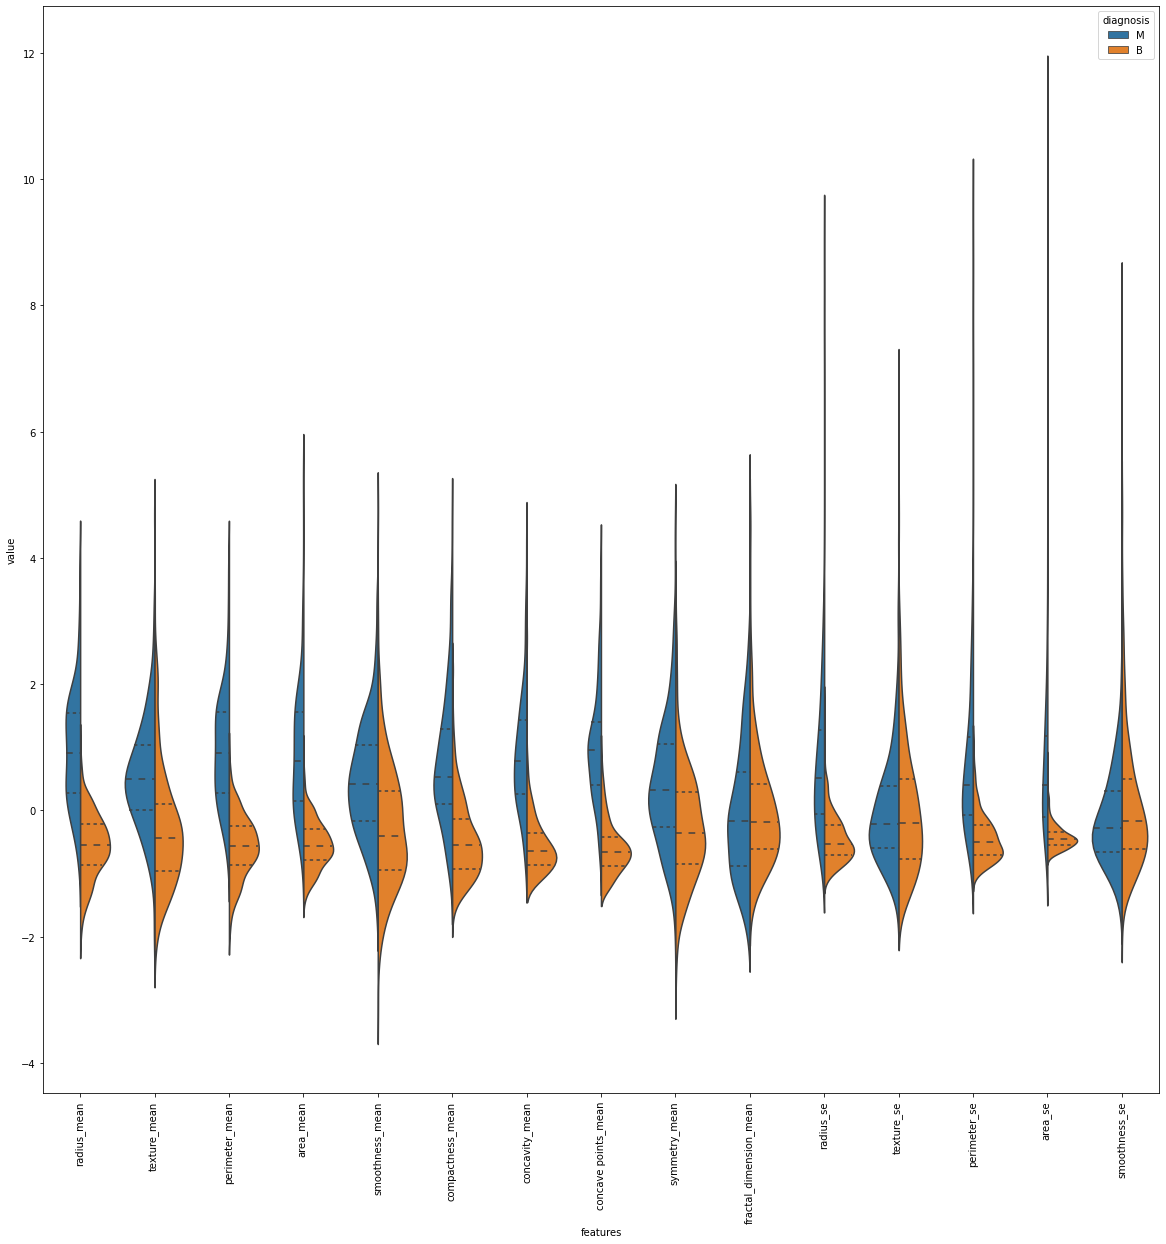

In [ ]:
data = (df- df.mean()) / (df.std())              # standardization
data = pd.concat([target,data.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<p>texture_mean feature  seems to be a good differenciator because median of the malignant and benign looks like separated.Howewer fractal_dimension_mean feature does not well </p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

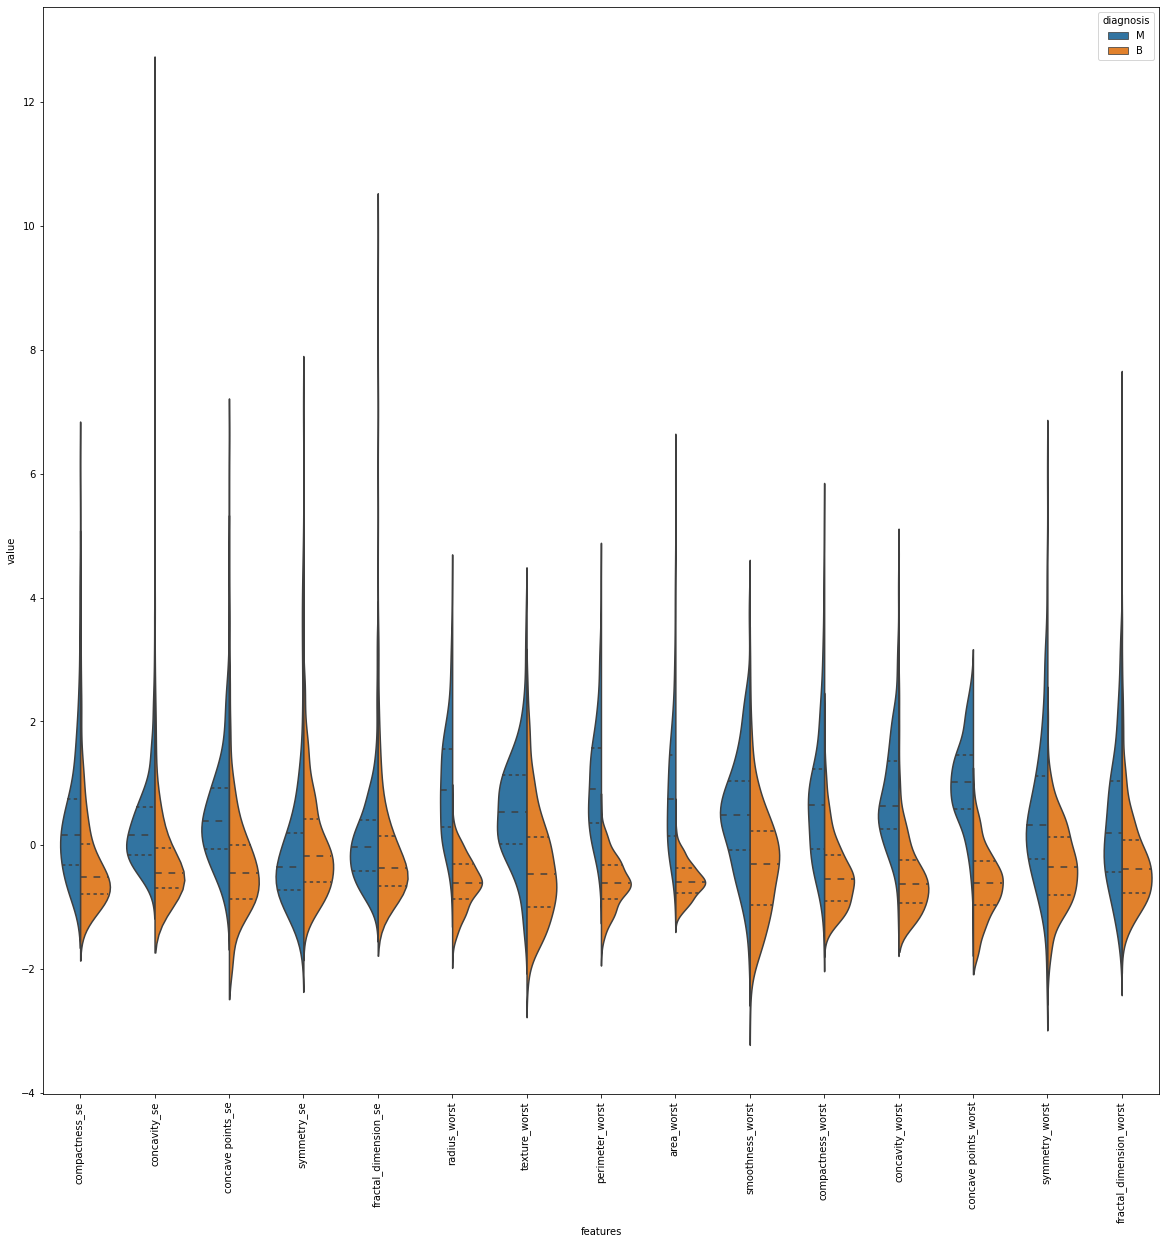

In [ ]:
data = (df- df.mean()) / (df.std())       
data = pd.concat([target,data.iloc[:,15:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

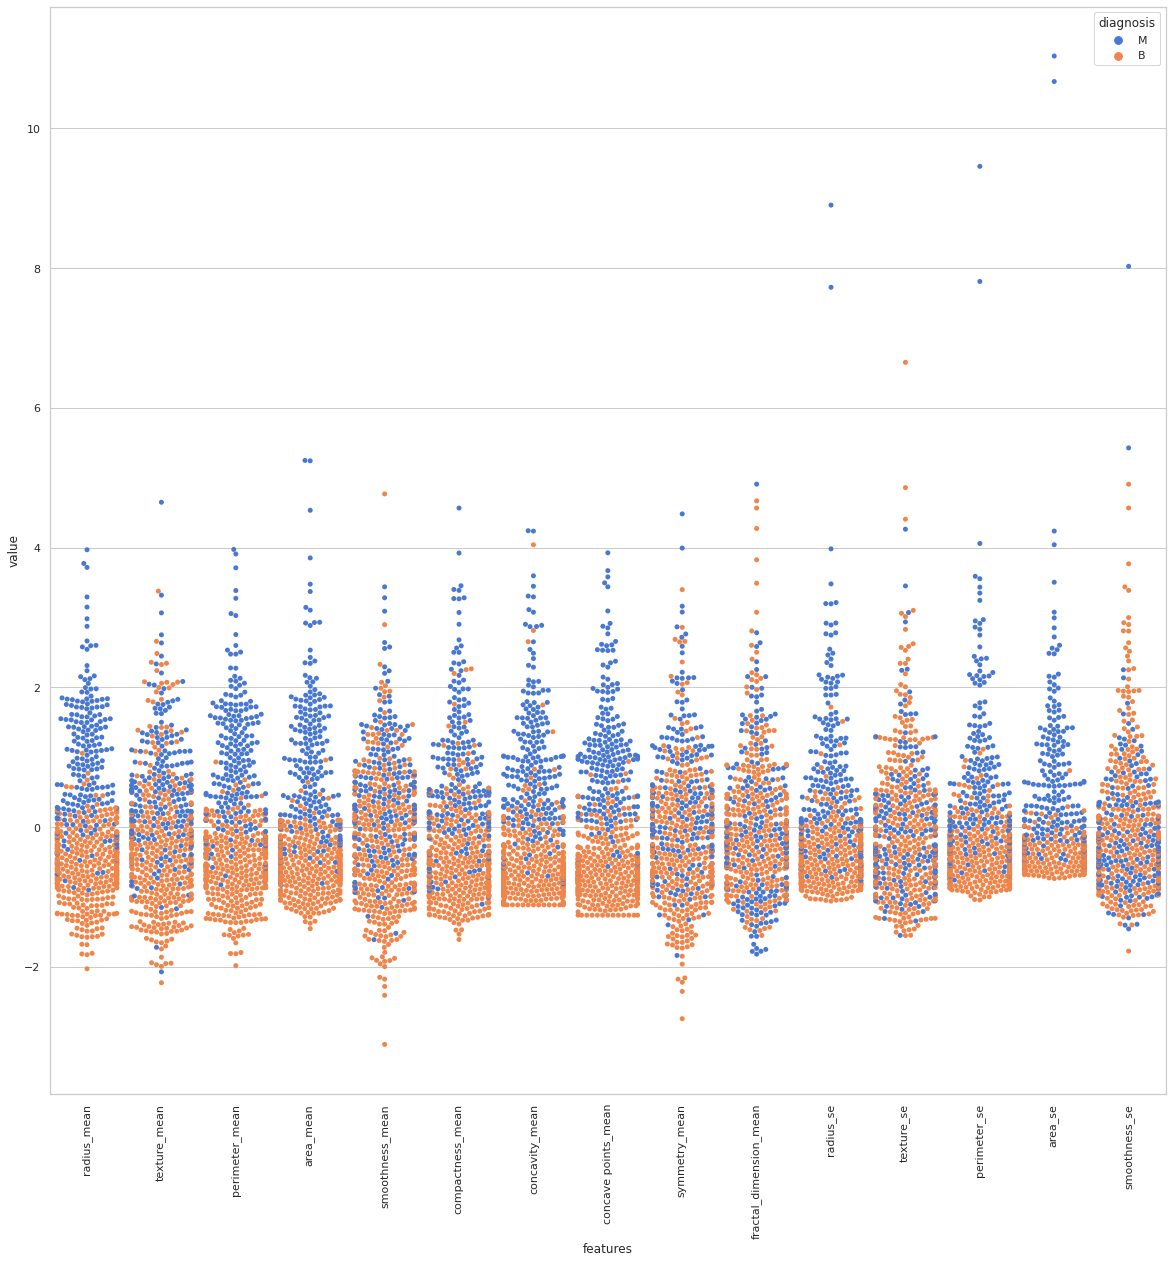

In [ ]:
sns.set(style="whitegrid", palette="muted")
data = (df- df.mean()) / (df.std())       
data = pd.concat([target,data.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
#sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<center> we now see variance more clearly</center>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

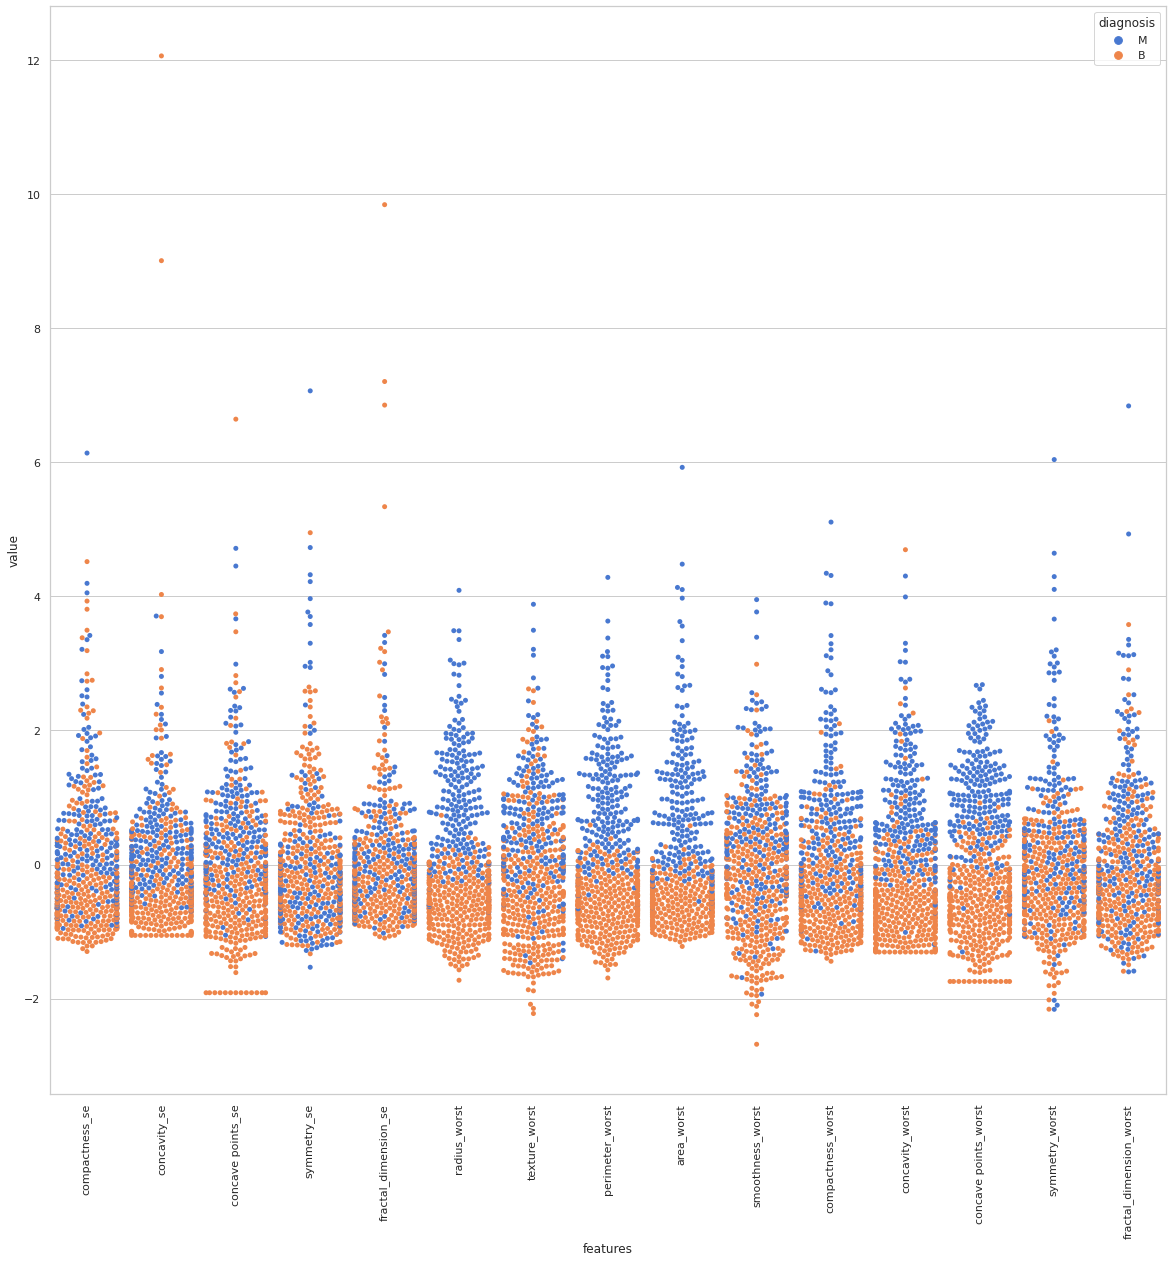

In [ ]:
sns.set(style="whitegrid", palette="muted")
data = (df- df.mean()) / (df.std())       
data = pd.concat([target,data.iloc[:,15:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
#sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<h3><center><strong>LightGradientBoost</center></h3>

In [ ]:
def display_importances(feature_importance_df_):
  cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:31].index
  best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
  plt.figure(figsize=(8, 10))
  sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
  plt.title('LightGBM Features (avg over folds)')
  plt.tight_layout()
  plt.savefig('lgbm_importances01.png')

In [ ]:

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(target)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 42)

In [ ]:
def kfold_stratified_lightgbm(X_train,X_test,y_train,y_test, num_folds, stratified = False):
  #training test data
  train_df=X_train
  test_df=X_test
  print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
  
  # Cross validation model
  if stratified:
    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
  else:
    folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)
  
  # Create arrays and dataframes to store results
  oof_preds = np.zeros(train_df.shape[0])
  sub_preds = np.zeros(test_df.shape[0])

  feature_importance_df = pd.DataFrame()
  feats =list(train_df.columns)
  
  for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df,y_train)):
    train_x, train_y = train_df.iloc[train_idx], y_train[train_idx]
    valid_x, valid_y = train_df.iloc[valid_idx],y_train[valid_idx]

    clf = LGBMClassifier(
            nthread=3,
        
            n_estimators=1600,
            learning_rate=0.02,
            num_leaves=31,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=10,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(test_df, num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del clf, train_x, train_y, valid_x, valid_y

  print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))
    # Write submission file and plot feature importance
  display_importances(feature_importance_df)
  return feature_importance_df

Starting LightGBM. Train shape: (398, 30), test shape: (171, 30)
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[7]	training's binary_logloss: 0.591289	training's auc: 0.95456	valid_1's binary_logloss: 0.539581	valid_1's auc: 0.991111
Fold  1 AUC : 0.991111
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[18]	training's binary_logloss: 0.500967	training's auc: 0.96101	valid_1's binary_logloss: 0.498862	valid_1's auc: 0.965201
Fold  2 AUC : 0.965201
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[13]	training's binary_logloss: 0.535971	training's auc: 0.957632	valid_1's binary_logloss: 0.566599	valid_1's auc: 0.925
Fold  3 AUC : 0.925000
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.6496	training's auc: 0.880378	valid_1's binary_logloss: 0.657795	valid_1

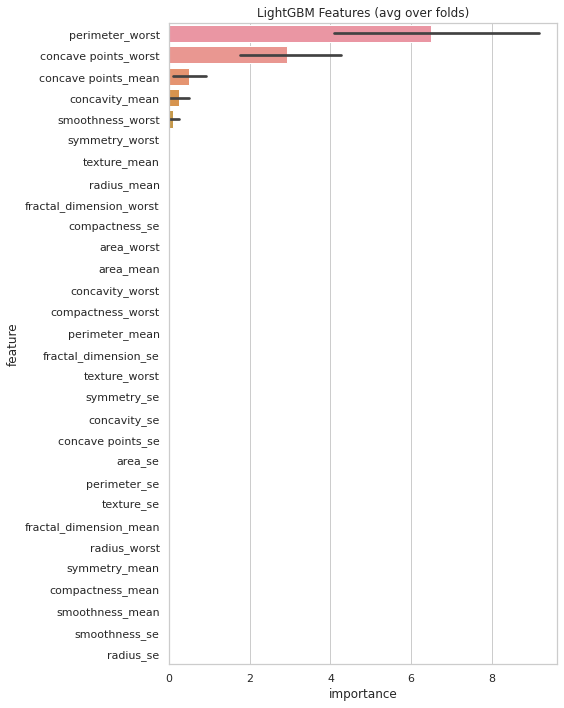

In [ ]:
 features_importance = kfold_stratified_lightgbm(X_train,X_test,y_train,y_test, num_folds= 12, stratified= False)

In [ ]:
 features_importance=features_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:31].index
 features_selected=list(feat_importance[:5])
 features_selected

['perimeter_worst',
 'concave points_worst',
 'concave points_mean',
 'concavity_mean',
 'smoothness_worst']

In [ ]:
X_train=X_train[features_selected]
X_test = X_test[features_selected]
clf = LGBMClassifier(
            nthread=3,
        n_estimators=1600,
            learning_rate=0.02,
            num_leaves=31,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=10,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
clf.fit(X_train, y_train, eval_set=[(X_train,y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 600, early_stopping_rounds= 500)


Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[34]	training's binary_logloss: 0.399802	training's auc: 0.966739	valid_1's binary_logloss: 0.38735	valid_1's auc: 0.984715


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.9497036, importance_type='split',
               learning_rate=0.02, max_depth=10, min_child_samples=20,
               min_child_weight=40, min_split_gain=0.0222415, n_estimators=1600,
               n_jobs=-1, nthread=3, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.04, reg_lambda=0.073, silent=-1,
               subsample=0.8715623, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

In [ ]:
filename='winsconsin_cancer_dataset.txt'
clf.booster_.save_model(filename)


In [ ]:
model = lgbm.Booster(model_file=filename)

<h2><center><font color='blue'>Feature Selection</font></center></h2>

<h4><center><font color='blue'>Feature selection with correlation</font></center><h4>
<p>Features with high correlation are more linearly dependent and hence have almost the same effect on the target. So, when two features have high correlation, we can drop one of the two features.</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 42)

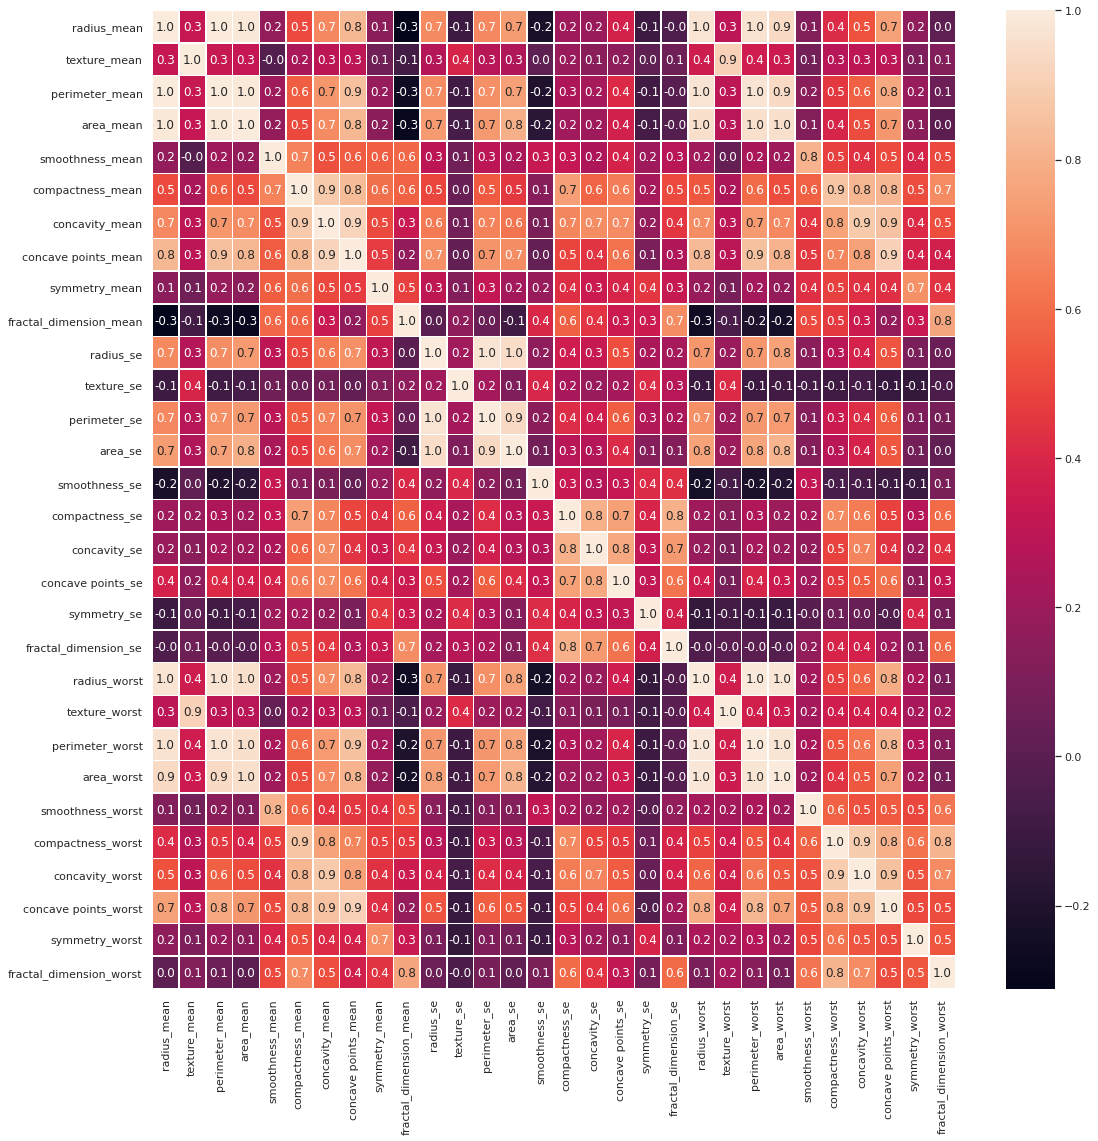

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
feature_to_remove = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_corr = df.drop(feature_to_remove,axis = 1 )   
df_corr.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<h3><center> </center> <center><font color='blue'>Random Forest with Correlation Feature Selection</font></center></h3>

Accuracy is:  0.9649122807017544


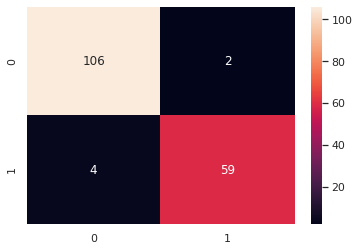

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(df_corr,target , test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

<h3><center><font color='blue'><strong> Neural Networks with correlation feature selection</strong></font></center></h3>

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(target)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_corr, y, test_size = 0.3, random_state = 42)


In [ ]:
#Feature Standard
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='random_uniform', activation='relu', input_dim=16))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(10,activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(1,activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6332
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.8191
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.9045
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.9020
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.9020
Epoch 6/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.8970
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.9146
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.8970
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.9070
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.8894
Epoch 11/150
4/4 [===========

0.9766081871345029


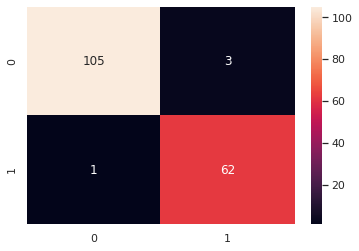

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

<center><font color='blue'> <strong>Univariate feature selection</strong></font></center>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 42)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train,y_train)
print('Score list:', select_feature.scores_)
print('Feature list:',X_train.columns)

Score list: [1.77946492e+02 6.06916433e+01 1.34061092e+03 3.66899557e+04
 1.00015175e-01 3.41839493e+00 1.30547650e+01 7.09766457e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.72696840e+02 6.12741067e+03 1.32470372e-03 3.74071521e-01
 6.92896719e-01 2.01587194e-01 1.39557806e-03 2.65927071e-03
 3.25782599e+02 1.16958562e+02 2.40512835e+03 7.50217341e+04
 2.63226314e-01 1.19077581e+01 2.58858117e+01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

<h3><center><font color='blue'>Random Forest with Univariate feature selection</font></center></h3>


Accuracy is:  0.9766081871345029


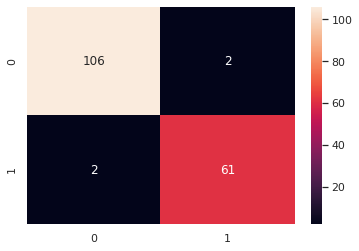

In [ ]:
X_train = select_feature.transform(X_train)
X_test = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

<h3>
<center><font color='blue'> <strong>Neurals Networks with Univariate Feature selection </strong></font></center></h3>

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y_train = labelencoder_X_1.fit_transform(y_train)
y_test = labelencoder_X_1.fit_transform(y_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()
classifier.add(Dense(5, kernel_initializer='random_uniform', activation='relu', input_dim=5))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(3,activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(1,activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.3894
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4322
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5402
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.7136
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.8518
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.8693
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.8794
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.8618
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.8643
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.8643
Epoch 11/150
4/4 [===========


<center><font color='blue'> <strong>Recursive Feature selection</strong></font></center>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 42)
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
selected_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
selected_features.sort_values(by='Ranking')


,Feature,Ranking
20,radius_worst,1
22,perimeter_worst,1
23,area_worst,1
27,concave points_worst,1
7,concave points_mean,1
6,concavity_mean,2
21,texture_worst,3
0,radius_mean,4
26,concavity_worst,5
2,perimeter_mean,6


In [ ]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [ ]:
Xtrain=X_train[['radius_worst','concave points_worst','perimeter_worst','concave points_mean','area_worst']]
Xtest=X_test[['radius_worst','concave points_worst','perimeter_worst','concave points_mean','area_worst']]

Accuracy is:  0.9649122807017544


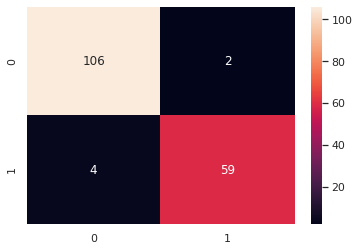

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(Xtrain,y_train)

ac = accuracy_score(y_test,clf_rf.predict(Xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(Xtest))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 43)

In [ ]:
clf_rf_5 = RandomForestClassifier(random_state=43)      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 27 (0.170543)
2. feature 22 (0.141577)
3. feature 23 (0.112093)
4. feature 6 (0.098437)
5. feature 20 (0.075461)
6. feature 2 (0.051751)
7. feature 3 (0.050838)
8. feature 7 (0.035193)
9. feature 13 (0.032891)
10. feature 0 (0.031644)
11. feature 26 (0.031134)
12. feature 1 (0.021855)
13. feature 21 (0.021568)
14. feature 24 (0.014516)
15. feature 10 (0.012949)
16. feature 25 (0.012493)
17. feature 5 (0.012050)
18. feature 12 (0.010952)
19. feature 28 (0.009730)
20. feature 16 (0.006956)
21. feature 4 (0.006832)
22. feature 29 (0.006277)
23. feature 19 (0.005296)
24. feature 14 (0.004680)
25. feature 17 (0.004516)
26. feature 15 (0.004423)
27. feature 9 (0.004087)
28. feature 11 (0.004030)
29. feature 18 (0.002868)
30. feature 8 (0.002360)


In [ ]:
Xtrain=X_train[['concave points_worst','perimeter_worst','area_worst','concavity_mean', 'radius_worst']]
Xtest=X_test[['concave points_worst','perimeter_worst','area_worst','concavity_mean', 'radius_worst']]

Accuracy is:  0.9590643274853801


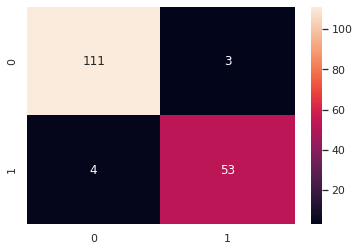

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(Xtrain,y_train)

ac = accuracy_score(y_test,clf_rf.predict(Xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(Xtest))
sns.heatmap(cm,annot=True,fmt="d")

<center><h3><a href="https://ibrahim-projets.herokuapp.com/projets/wisconsin_cancer/" target="_top">Try the web app</a></h3></center>